In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
X=df.iloc[:,1:32]

In [32]:
Diagnosis=pd.get_dummies(X['diagnosis'],drop_first=True,dtype=int)
Diagnosis

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [33]:
X=pd.concat([X,Diagnosis],axis=1)
X=X.drop(['diagnosis'],axis=1)

In [34]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [51]:
y=X.iloc[:,30]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: M, Length: 569, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [40]:
classifier=Sequential()

In [41]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=31))

In [42]:
#second hidden layer
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
#output layer
classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [43]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 0.7271 - accuracy: 0.5592 - val_loss: 0.6436 - val_accuracy: 0.6689
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.6170 - accuracy: 0.7105 - val_loss: 0.5639 - val_accuracy: 0.7748
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7928 - val_loss: 0.5011 - val_accuracy: 0.8477
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8355 - val_loss: 0.4473 - val_accuracy: 0.8742
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8684 - val_loss: 0.4025 - val_accuracy: 0.8940
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8849 - val_loss: 0.3668 - val_accuracy: 0.9139
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8947 - val_loss: 0.3355 - val_accuracy: 0.9139
Epoch 8/10
31/31 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


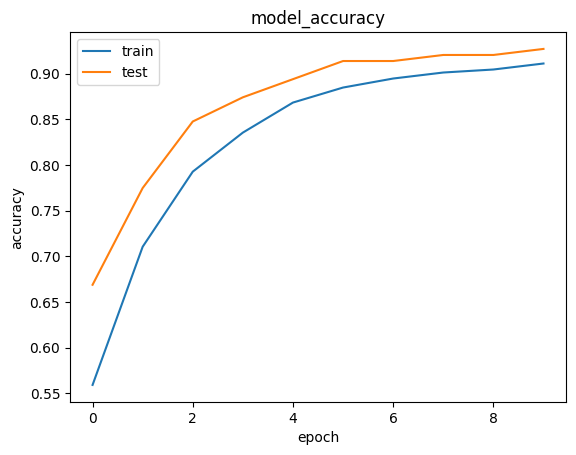

In [45]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

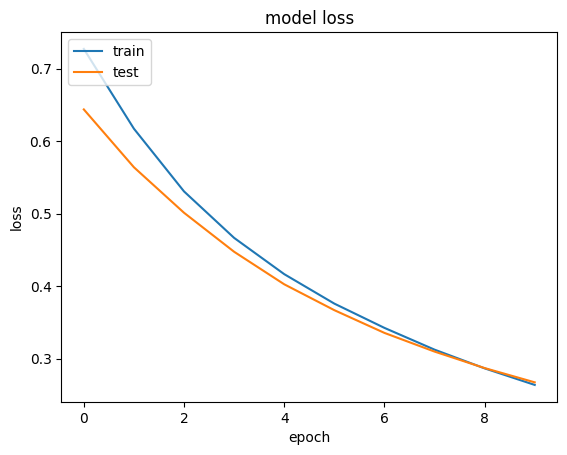

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 0s/step
